In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
# Load data
df = pd.read_csv("/Users/mariahloehr/IICD/IICD/Data/cell_cycle_tidied.csv")

# Combine phase M and G2 into one class
df['phase'] = df['phase'].replace({'M': 'G2'})

# Separate features and target
X = df.drop(columns=['phase', 'age', 'PHATE_1', 'PHATE_2'])
y = df['phase']

# Split data into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=949, stratify=y)

In [3]:
# retrain model
rf = RandomForestClassifier(n_estimators=500, max_depth=50, max_features=250, random_state=949)
rf.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

<Axes: title={'center': 'Random Forest MDI (Top 20)'}>

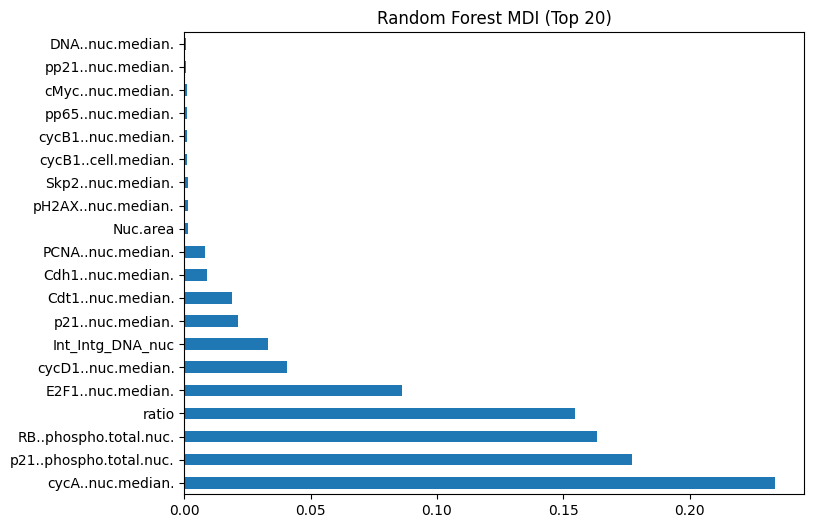

In [6]:
# Extract MDI importances
rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
rf_importances_sorted = rf_importances.sort_values(ascending=False)

# Top features
rf_importances_sorted.head(20).plot(kind='barh', figsize=(8, 6), title='Random Forest MDI (Top 20)')

LOCO

In [6]:
import sys
sys.path.append("/Users/mariahloehr/IICD/IICD/feature_importance/locomp")

In [7]:
from locomp import *
from locomp.MLmodels import *
import itertools